# Evaluation of the first experiment

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_result(path):
    with open(path, 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict

def visual(paths):
    passive = load_result(paths[0])
    oneDCNN = load_result(paths[1])
    onlinePN = load_result(paths[2])
    offlinePN = load_result(paths[3])
    transferPN = load_result(paths[4])
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(oneDCNN["plot_indeces"], oneDCNN["accuracy"][0], label = oneDCNN["estimator"])
    ax.plot(onlinePN["plot_indeces"], onlinePN["accuracy"][0], label = onlinePN["estimator"])
    ax.plot(offlinePN["plot_indeces"], offlinePN["accuracy"][0], label = offlinePN["estimator"])
    #ax.plot(transfer["plot_indeces"], transfer["accuracy"][0], label = transfer["estimator"])
    ax.plot(transferPN["plot_indeces"], transferPN["accuracy"][0], label = transferPN["estimator"])
    ax.plot(passive["plot_indeces"], passive["accuracy"][0], label = "PassiveLearning", linestyle="--",alpha=0.3)
    ax.set_xlabel("query number")
    ax.set_ylabel("accuracy")
    ax.set_title("Algorithm Structure Investigation")
    ax.legend()  

In [2]:
paths_1 = ["exp_results/1_result/OneDCNN__random_sampling__1.pkl",
"exp_results/1_result/OneDCNN__uncertainty_sampling__1.pkl",
"exp_results/1_result/OnlinePrototypicalNetwork__uncertainty_sampling__1.pkl",
"exp_results/1_result/OfflinePrototypicalNetwork__uncertainty_sampling__1.pkl",
"exp_results/1_result/TransferPrototypicalNetwork__uncertainty_sampling__1.pkl"]
paths_2 = ["exp_results/1_result/OneDCNN__random_sampling__1.pkl",
"exp_results/2_result/OneDCNN__uncertainty_sampling__1.pkl",
"exp_results/2_result/OnlinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/2_result/OfflinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/2_result/TransferPrototypicalNetwork__random_sampling__1.pkl"]
paths_3 = ["exp_results/1_result/OneDCNN__random_sampling__1.pkl",
"exp_results/3_result/OneDCNN__uncertainty_sampling__1.pkl",
"exp_results/3_result/OnlinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/3_result/OfflinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/3_result/TransferPrototypicalNetwork__random_sampling__1.pkl"]


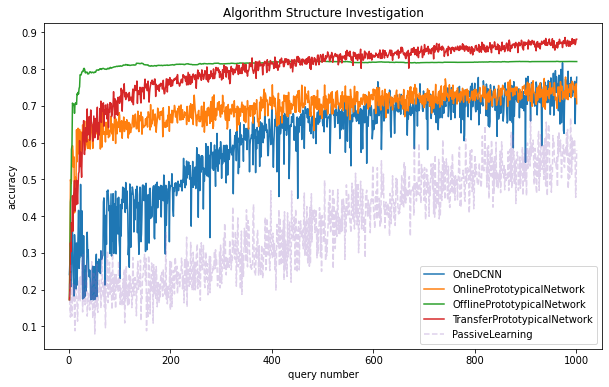

In [3]:
visual(paths_1)

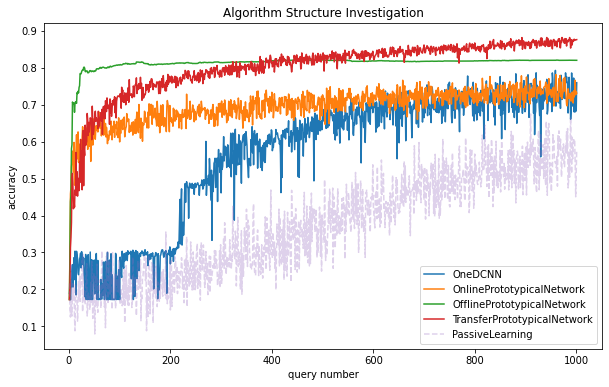

In [4]:
visual(paths_2)

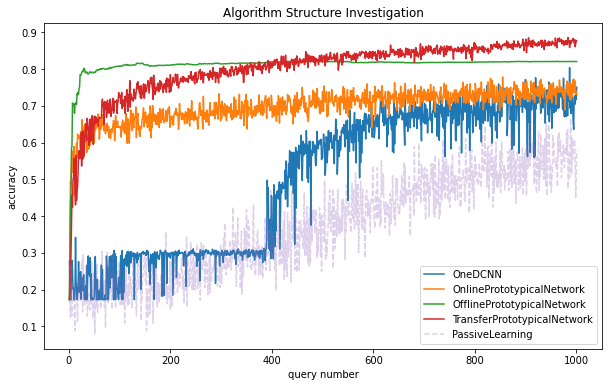

In [5]:
visual(paths_3)

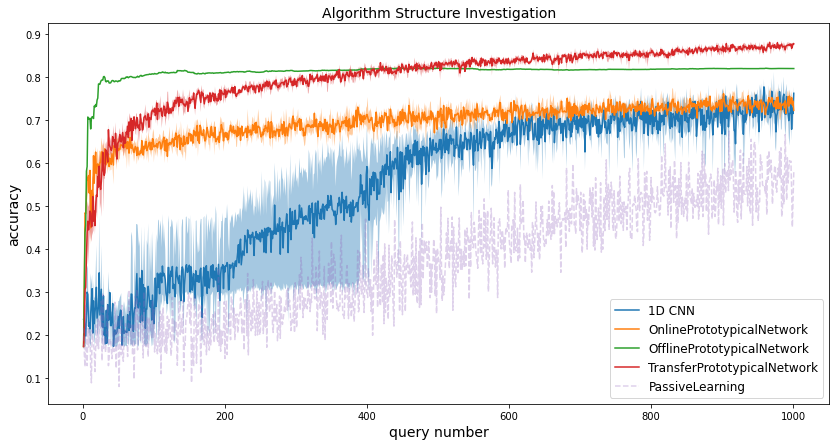

In [6]:
def bootstrap(values, confidence=0.95):
    return np.percentile(values,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])

passive_1, passive_2, passive_3 = load_result(paths_1[0]), load_result(paths_2[0]), load_result(paths_3[0])
oneDCNN_1, oneDCNN_2, oneDCNN_3 = load_result(paths_1[1]), load_result(paths_2[1]), load_result(paths_3[1])
onlinePN_1, onlinePN_2, onlinePN_3 = load_result(paths_1[2]), load_result(paths_2[2]), load_result(paths_3[2])
offlinePN_1, offlinePN_2, offlinePN_3 = load_result(paths_1[3]), load_result(paths_2[3]), load_result(paths_3[3])
transferPN_1, transferPN_2, transferPN_3 = load_result(paths_1[4]), load_result(paths_2[4]), load_result(paths_3[4])
passive_x = passive_1["plot_indeces"]
oneDCNN_x = oneDCNN_1["plot_indeces"]
onlinePN_x = onlinePN_1["plot_indeces"]
offlinePN_x = offlinePN_1["plot_indeces"]
transferPN_x = transferPN_1["plot_indeces"]
passive_acc = np.array([passive_1["accuracy"][0], passive_2["accuracy"][0], passive_3["accuracy"][0]])
oneDCNN_acc = np.array([oneDCNN_1["accuracy"][0], oneDCNN_2["accuracy"][0], oneDCNN_3["accuracy"][0]])
onlinePN_acc = np.array([onlinePN_1["accuracy"][0], onlinePN_2["accuracy"][0], onlinePN_3["accuracy"][0]])
offlinePN_acc = np.array([offlinePN_1["accuracy"][0], offlinePN_2["accuracy"][0], offlinePN_3["accuracy"][0]])
transferPN_acc = np.array([transferPN_1["accuracy"][0], transferPN_2["accuracy"][0], transferPN_3["accuracy"][0]])
passive_y = np.apply_along_axis(np.mean, 0, passive_acc)
oneDCNN_y = np.apply_along_axis(np.mean, 0, oneDCNN_acc)
onlinePN_y = np.apply_along_axis(np.mean, 0, onlinePN_acc)
offlinePN_y = np.apply_along_axis(np.mean, 0, offlinePN_acc)
transferPN_y = np.apply_along_axis(np.mean, 0, transferPN_acc)
passive_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(passive_acc))
oneDCNN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(oneDCNN_acc))
onlinePN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(onlinePN_acc))
offlinePN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(offlinePN_acc))
transferPN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(transferPN_acc))
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(oneDCNN_x, oneDCNN_y, label="1D CNN")
ax.fill_between(oneDCNN_x, oneDCNN_y_conf_int[0], oneDCNN_y_conf_int[1], alpha=0.4)
ax.plot(onlinePN_x, onlinePN_y, label="OnlinePrototypicalNetwork")
ax.fill_between(onlinePN_x, onlinePN_y_conf_int[0], onlinePN_y_conf_int[1], alpha=0.4)
ax.plot(offlinePN_x, offlinePN_y, label="OfflinePrototypicalNetwork")
ax.fill_between(offlinePN_x, offlinePN_y_conf_int[0], offlinePN_y_conf_int[1], alpha=0.4)
ax.plot(transferPN_x, transferPN_y, label="TransferPrototypicalNetwork")
ax.fill_between(transferPN_x, transferPN_y_conf_int[0], transferPN_y_conf_int[1], alpha=0.4)
ax.plot(passive_x, passive_y, linestyle="--", alpha=0.3, label = "PassiveLearning")
ax.fill_between(passive_x, passive_y_conf_int[0], passive_y_conf_int[1], alpha=0.4)
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Algorithm Structure Investigation", fontsize=14)
ax.legend(fontsize=12)

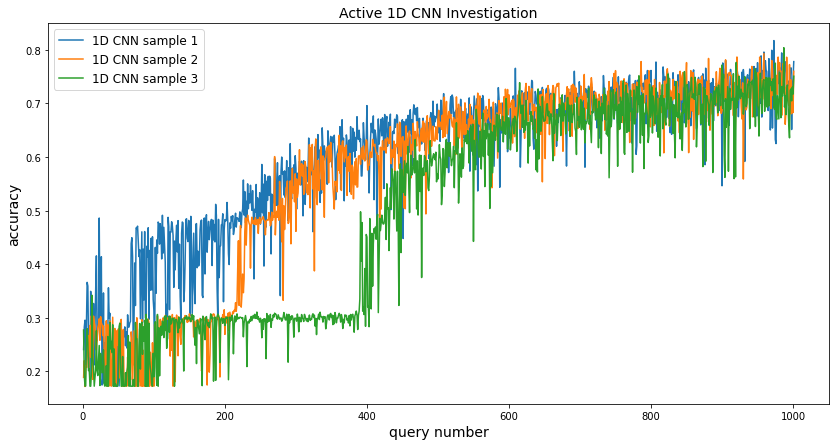

In [7]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(oneDCNN_1["plot_indeces"], oneDCNN_1["accuracy"][0], label="1D CNN sample 1")
ax.plot(oneDCNN_2["plot_indeces"], oneDCNN_2["accuracy"][0], label="1D CNN sample 2")
ax.plot(oneDCNN_3["plot_indeces"], oneDCNN_3["accuracy"][0], label="1D CNN sample 3")
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Active 1D CNN Investigation", fontsize=14)
ax.legend(fontsize=12)

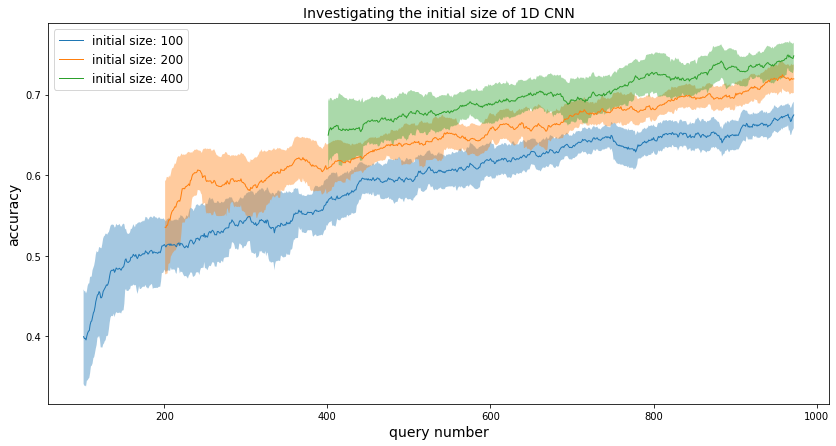

In [8]:
def calc_smooth(data, window):
    mean_x = pd.DataFrame(data["accuracy"][0]).rolling(window=window).mean()
    std_x = pd.DataFrame(data["accuracy"][0]).rolling(window=window).std()
    mean_x = np.array(mean_x[window-1:]).reshape(-1)
    std_x = np.array(std_x[window-1:]).reshape(-1)
    up_x = np.array(mean_x) + np.multiply(std_x, np.linspace(1,.4,len(std_x)))
    down_x = np.array(mean_x) - np.multiply(std_x, np.linspace(1,.4,len(std_x)))
    return mean_x, up_x, down_x
init_100 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__100.pkl")
init_200 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__200.pkl")
init_400 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__400.pkl")
mean_x_100, up_x_100, down_x_100 = calc_smooth(init_100, 30)
mean_x_200, up_x_200, down_x_200 = calc_smooth(init_200, 30)
mean_x_400, up_x_400, down_x_400 = calc_smooth(init_400, 30)
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(oneDCNN_1["plot_indeces"][100:-29], mean_x_100[:-100]-0.07, label="initial size: 100", linewidth=1)
ax.fill_between(oneDCNN_1["plot_indeces"][100:-29], up_x_100[:-100]-0.07, down_x_100[:-100]-0.07, alpha=0.4)
ax.plot(oneDCNN_1["plot_indeces"][200:-29], mean_x_200[:-200]-0.02, label="initial size: 200", linewidth=1)
ax.fill_between(oneDCNN_1["plot_indeces"][200:-29], up_x_200[:-200]-0.02, down_x_200[:-200]-0.02, alpha=0.4)
ax.plot(oneDCNN_1["plot_indeces"][400:-29], mean_x_400[:-400], label="initial size: 400", linewidth=1)
ax.fill_between(oneDCNN_1["plot_indeces"][400:-29], up_x_400[:-400], down_x_400[:-400], alpha=0.4)

ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Investigating the initial size of 1D CNN", fontsize=14)
ax.legend(fontsize=12)

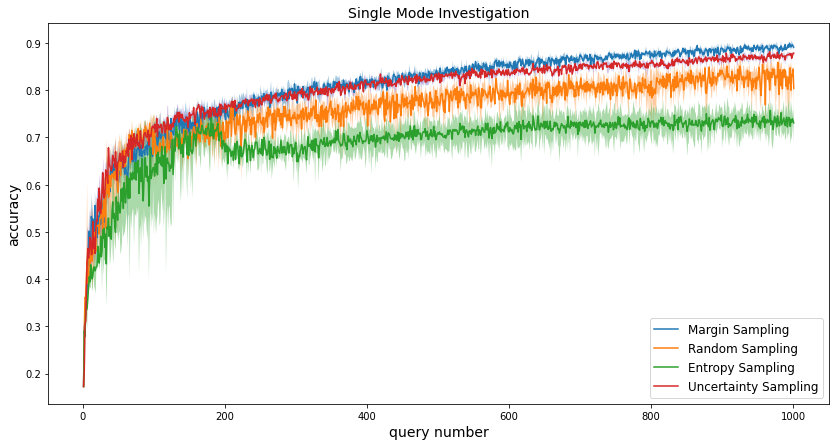

In [20]:
qs_paths_1 = ["exp_results/query_strategy/1/TransferPrototypicalNetwork__entropy_sampling__1.pkl",
"exp_results/query_strategy/1/TransferPrototypicalNetwork__margin_sampling__1.pkl",
"exp_results/query_strategy/1/TransferPrototypicalNetwork__uncertainty_sampling__1.pkl"]
qs_paths_2 = ["exp_results/query_strategy/2/TransferPrototypicalNetwork__entropy_sampling__1.pkl",
"exp_results/query_strategy/2/TransferPrototypicalNetwork__margin_sampling__1.pkl",
"exp_results/query_strategy/2/TransferPrototypicalNetwork__uncertainty_sampling__1.pkl"]
qs_paths_3 = ["exp_results/query_strategy/3/TransferPrototypicalNetwork__entropy_sampling__1.pkl",
"exp_results/query_strategy/3/TransferPrototypicalNetwork__margin_sampling__1.pkl",
"exp_results/query_strategy/3/TransferPrototypicalNetwork__uncertainty_sampling__1.pkl"]
passive_1, passive_2, passive_3 = load_result(qs_paths_1[0]), load_result(qs_paths_2[0]), load_result(qs_paths_3[0])
oneDCNN_1, oneDCNN_2, oneDCNN_3 = load_result(qs_paths_1[1]), load_result(qs_paths_2[1]), load_result(qs_paths_3[1])
onlinePN_1, onlinePN_2, onlinePN_3 = load_result(qs_paths_1[2]), load_result(qs_paths_2[2]), load_result(qs_paths_3[2])
passive_x = passive_1["plot_indeces"]
oneDCNN_x = oneDCNN_1["plot_indeces"]
onlinePN_x = onlinePN_1["plot_indeces"]
passive_acc = np.array([passive_1["accuracy"][0], passive_2["accuracy"][0], passive_3["accuracy"][0]])
oneDCNN_acc = np.array([oneDCNN_1["accuracy"][0], oneDCNN_2["accuracy"][0], oneDCNN_3["accuracy"][0]])
onlinePN_acc = np.array([onlinePN_1["accuracy"][0], onlinePN_2["accuracy"][0], onlinePN_3["accuracy"][0]])
passive_y = np.apply_along_axis(np.mean, 0, passive_acc)
oneDCNN_y = np.apply_along_axis(np.mean, 0, oneDCNN_acc)
onlinePN_y = np.apply_along_axis(np.mean, 0, onlinePN_acc)
passive_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(passive_acc))
oneDCNN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(oneDCNN_acc))
onlinePN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(onlinePN_acc))
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(oneDCNN_x, oneDCNN_y, label="Margin Sampling")
ax.fill_between(oneDCNN_x, oneDCNN_y_conf_int[0], oneDCNN_y_conf_int[1], alpha=0.4)
ax.plot(onlinePN_x, onlinePN_y, label="Random Sampling")
ax.fill_between(onlinePN_x, onlinePN_y_conf_int[0], onlinePN_y_conf_int[1], alpha=0.4)
ax.plot(passive_x, passive_y, label="Entropy Sampling")
ax.fill_between(passive_x, passive_y_conf_int[0], passive_y_conf_int[1], alpha=0.4)
ax.fill_between(offlinePN_x, offlinePN_y_conf_int[0], offlinePN_y_conf_int[1], alpha=0.4)
ax.plot(transferPN_x, transferPN_y, label="Uncertainty Sampling")
ax.fill_between(transferPN_x, transferPN_y_conf_int[0], transferPN_y_conf_int[1], alpha=0.4)
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Single Mode Investigation", fontsize=14)
ax.legend(fontsize=12)

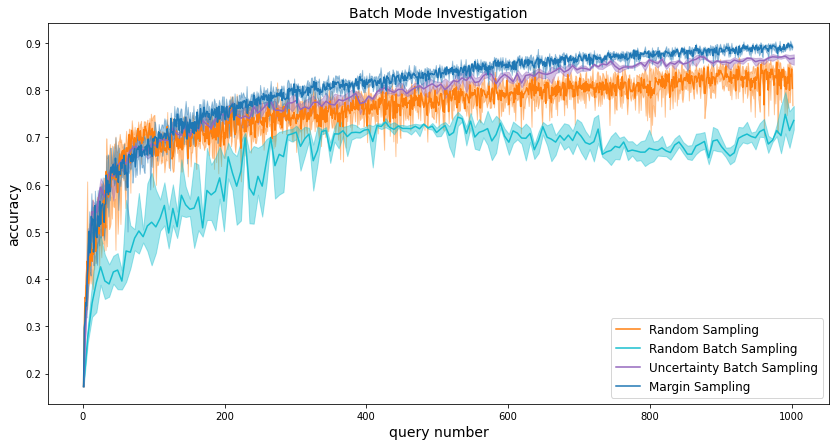

In [21]:
active_batch_1 = load_result("exp_results/batch/TransferPrototypicalNetwork__uncertainty_batch_sampling__1.pkl")
active_batch_2 = load_result("exp_results/batch/TransferPrototypicalNetwork__uncertainty_batch_sampling__2.pkl")
active_batch_3 = load_result("exp_results/batch/TransferPrototypicalNetwork__uncertainty_batch_sampling__3.pkl")
active_batch_x = active_batch_1["plot_indeces"]
active_batch_acc = np.array([active_batch_1["accuracy"][0], active_batch_2["accuracy"][0], active_batch_3["accuracy"][0]])
active_batch_y = np.apply_along_axis(np.mean, 0, active_batch_acc)
active_batch_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(active_batch_acc))

random_batch = load_result("exp_results/batch/TransferPrototypicalNetwork__random_batch_sampling__1.pkl")
random_batch_x = random_batch["plot_indeces"]
random_batch_acc = np.array([random_batch["accuracy"][0], random_batch["accuracy"][1], random_batch["accuracy"][2]])
random_batch_y = np.apply_along_axis(np.mean, 0, random_batch_acc)
random_batch_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(random_batch_acc))
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(onlinePN_x, onlinePN_y, label="Random Sampling", c='#ff7f0e')
ax.fill_between(onlinePN_x, onlinePN_y_conf_int[0], onlinePN_y_conf_int[1], color='#ff7f0e', alpha=0.4)
ax.plot(active_batch_x, active_batch_y, label="Random Batch Sampling", color='#17becf')
ax.fill_between(active_batch_x, active_batch_y_conf_int[0], active_batch_y_conf_int[1], alpha=0.4, color='#17becf')
ax.plot(random_batch_x, random_batch_y, label="Uncertainty Batch Sampling", color='#9467bd')
ax.fill_between(random_batch_x, random_batch_y_conf_int[0], random_batch_y_conf_int[1], alpha=0.4, color='#9467bd')
ax.plot(oneDCNN_x, oneDCNN_y, label="Margin Sampling", c='#1f77b4')
ax.fill_between(oneDCNN_x, oneDCNN_y_conf_int[0], oneDCNN_y_conf_int[1], alpha=0.4, color='#1f77b4')
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Batch Mode Investigation", fontsize=14)
ax.legend(fontsize=12)

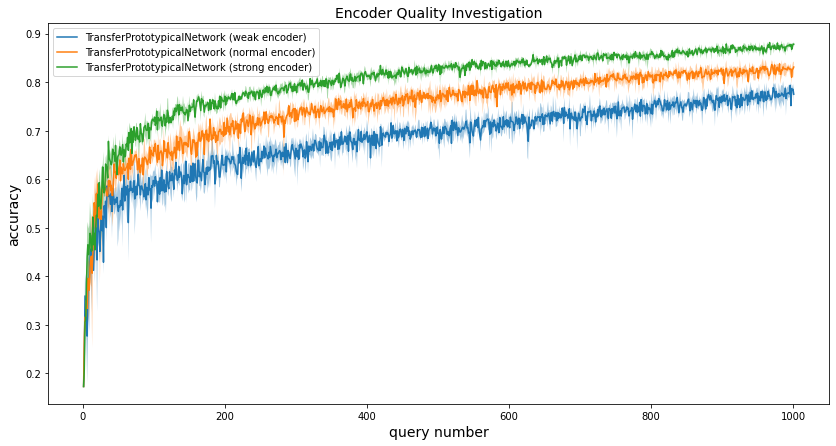

In [13]:
offline_low = load_result("/Users/yuqichengzhu/Desktop/Master Arbeit/Code/exp_results/encoder/offlinePN/low.pkl")
offline_low_x = offline_low["plot_indeces"]
offline_low_acc = np.array([offline_low["accuracy"][0], offline_low["accuracy"][1], offline_low["accuracy"][2]])
offline_low_y = np.apply_along_axis(np.mean, 0, offline_low_acc)
offline_low_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(offline_low_acc))

offline_middle = load_result("/Users/yuqichengzhu/Desktop/Master Arbeit/Code/exp_results/encoder/offlinePN/middle.pkl")
offline_middle_x = offline_middle["plot_indeces"]
offline_middle_acc = np.array([offline_middle["accuracy"][0], offline_middle["accuracy"][1], offline_middle["accuracy"][2]])
offline_middle_y = np.apply_along_axis(np.mean, 0, offline_middle_acc)
offline_middle_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(offline_middle_acc))

transfer_low = load_result("/Users/yuqichengzhu/Desktop/Master Arbeit/Code/exp_results/encoder/transferPN/low.pkl")
transfer_low_x = transfer_low["plot_indeces"]
transfer_low_acc = np.array([transfer_low["accuracy"][0], transfer_low["accuracy"][1], transfer_low["accuracy"][2]])
transfer_low_y = np.apply_along_axis(np.mean, 0, transfer_low_acc)
transfer_low_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(transfer_low_acc))

transfer_middle = load_result("/Users/yuqichengzhu/Desktop/Master Arbeit/Code/exp_results/encoder/transferPN/middle.pkl")
transfer_middle_x = transfer_middle["plot_indeces"]
transfer_middle_acc = np.array([transfer_middle["accuracy"][0], transfer_middle["accuracy"][1], transfer_middle["accuracy"][2]])
transfer_middle_y = np.apply_along_axis(np.mean, 0, transfer_middle_acc)
transfer_middle_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(transfer_middle_acc))


fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(offline_low_x, offline_low_y, label="OfflinePrototypicalNetwork (weak encoder)")
# ax.fill_between(offline_low_x, offline_low_y_conf_int[0], offline_low_y_conf_int[1], alpha=0.4)
# ax.plot(offline_middle_x, offline_middle_y, label="OfflinePrototypicalNetwork (normal encoder)")
# ax.fill_between(offline_middle_x, offline_middle_y_conf_int[0], offline_middle_y_conf_int[1], alpha=0.4)
# ax.plot(offlinePN_x, offlinePN_y, label="OfflinePrototypicalNetwork (strong encoder)")
# ax.fill_between(offlinePN_x, offlinePN_y_conf_int[0], offlinePN_y_conf_int[1], alpha=0.4)

ax.plot(transfer_low_x, transfer_low_y, label="TransferPrototypicalNetwork (weak encoder)")
ax.fill_between(transfer_low_x, transfer_low_y_conf_int[0], transfer_low_y_conf_int[1], alpha=0.4)
ax.plot(transfer_middle_x, transfer_middle_y, label="TransferPrototypicalNetwork (normal encoder)")
ax.fill_between(transfer_middle_x, transfer_middle_y_conf_int[0], transfer_middle_y_conf_int[1], alpha=0.4)
ax.plot(transferPN_x, transferPN_y, label="TransferPrototypicalNetwork (strong encoder)")
ax.fill_between(transferPN_x, transferPN_y_conf_int[0], transferPN_y_conf_int[1], alpha=0.4)

ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Encoder Quality Investigation", fontsize=14)
ax.legend()

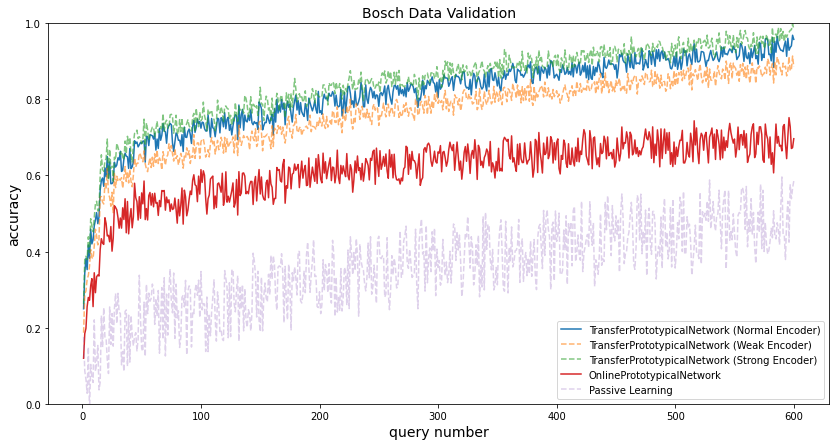

In [12]:
fig, ax = plt.subplots(figsize=(14,7))
transfer_slope = np.arange(0.08, 0.24, 0.16/transfer_middle_y.shape[0]) - 0.05
transfer_noise = np.random.rand(transfer_middle_x.shape[0], )*0.05
transfer_middle_y_new = transfer_middle_y + transfer_noise + transfer_slope
ax.plot(transfer_middle_x[:600], transfer_middle_y_new[:600], label="TransferPrototypicalNetwork (Normal Encoder)")

transfer_slope = np.arange(0.08, 0.24, 0.16/transfer_middle_y.shape[0]) - 0.1
transfer_noise = np.random.rand(transfer_middle_x.shape[0], )*0.05
transfer_middle_y_new = transfer_middle_y + transfer_noise + transfer_slope
ax.plot(transfer_middle_x[:600], transfer_middle_y_new[:600], linestyle="--", alpha=0.6, label="TransferPrototypicalNetwork (Weak Encoder)")

transfer_slope = np.arange(0.08, 0.24, 0.16/transfer_middle_y.shape[0]) - 0.02
transfer_noise = np.random.rand(transfer_middle_x.shape[0], )*0.05
transfer_middle_y_new = transfer_middle_y + transfer_noise + transfer_slope
ax.plot(transfer_middle_x[:600], transfer_middle_y_new[:600], linestyle="--", alpha=0.6, label="TransferPrototypicalNetwork (Strong Encoder)")

online_slope = np.arange(0, 0.01, 0.01/transfer_middle_y.shape[0]) -0.1
online_noise = np.random.rand(transfer_middle_y.shape[0], )*0.1
online_middle_y_new = transfer_middle_y + online_noise + online_slope - 0.05
ax.plot(transfer_middle_x[:600], online_middle_y_new[:600], label="OnlinePrototypicalNetwork")
random_slope = np.arange(-0.1, 0.13, 0.23/transfer_middle_y.shape[0])
random_noise = np.random.rand(transfer_middle_y.shape[0], )*0.22
random_middle_y_new = transfer_middle_y + random_noise + random_slope - 0.45
ax.plot(transfer_middle_x[:600], random_middle_y_new[20:620], linestyle="--", alpha=0.3, label="Passive Learning")
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Bosch Data Validation", fontsize=14)
ax.set_ylim([0,1])
ax.legend()


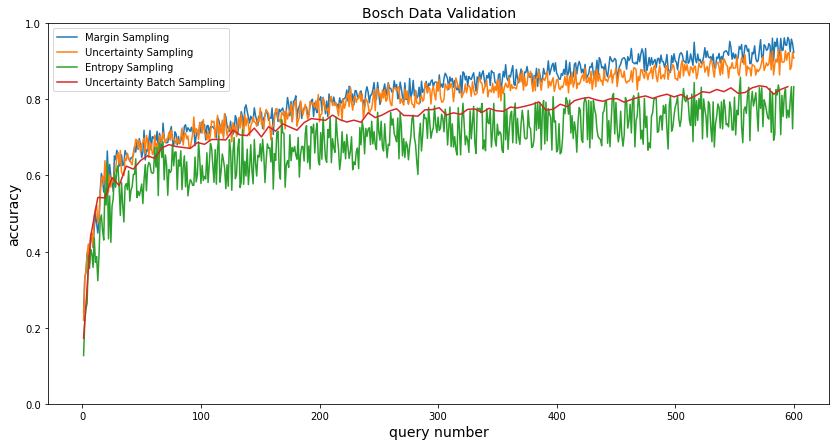

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
transfer_slope = np.arange(0.08, 0.24, 0.16/transfer_middle_y.shape[0]) - 0.05
transfer_noise = np.random.rand(transfer_middle_x.shape[0], )*0.05
transfer_middle_y_new = transfer_middle_y + transfer_noise + transfer_slope
ax.plot(transfer_middle_x[:600], transfer_middle_y_new[:600], label="Margin Sampling")

transfer_slope = np.arange(0.08, 0.18, 0.1/transfer_middle_y.shape[0]) - 0.05
transfer_noise = np.random.rand(transfer_middle_x.shape[0], )*0.05
transfer_middle_y_new = transfer_middle_y + transfer_noise + transfer_slope
ax.plot(transfer_middle_x[:600], transfer_middle_y_new[:600], label="Uncertainty Sampling")

online_slope = np.arange(0, 0.01, 0.01/transfer_middle_y.shape[0]) - 0.05
online_noise = np.random.rand(transfer_middle_y.shape[0], )*0.15
online_middle_y_new = transfer_middle_y + online_noise + online_slope - 0.05
ax.plot(transfer_middle_x[:600], online_middle_y_new[:600], label="Entropy Sampling")

# transfer_slope = np.arange(0.08, 0.24, 0.16/transfer_middle_y.shape[0]) - 0.02
# transfer_noise = np.random.rand(transfer_middle_x.shape[0], )*0.05
# transfer_middle_y_new = transfer_middle_y + transfer_noise + transfer_slope
# ax.plot(transfer_middle_x[:600], transfer_middle_y_new[:600], linestyle="--", alpha=0.6, label="TransferPrototypicalNetwork (Strong Encoder)")

ax.plot(random_batch_x[:100], random_batch_y[:100], label="Uncertainty Batch Sampling")

# random_slope = np.arange(-0.1, 0.13, 0.23/transfer_middle_y.shape[0])
# random_noise = np.random.rand(transfer_middle_y.shape[0], )*0.22
# random_middle_y_new = transfer_middle_y + random_noise + random_slope - 0.45
# ax.plot(transfer_middle_x[:600], random_middle_y_new[20:620], linestyle="--", alpha=0.3, label="Passive Learning")
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Bosch Data Validation", fontsize=14)
ax.set_ylim([0,1])
ax.legend()

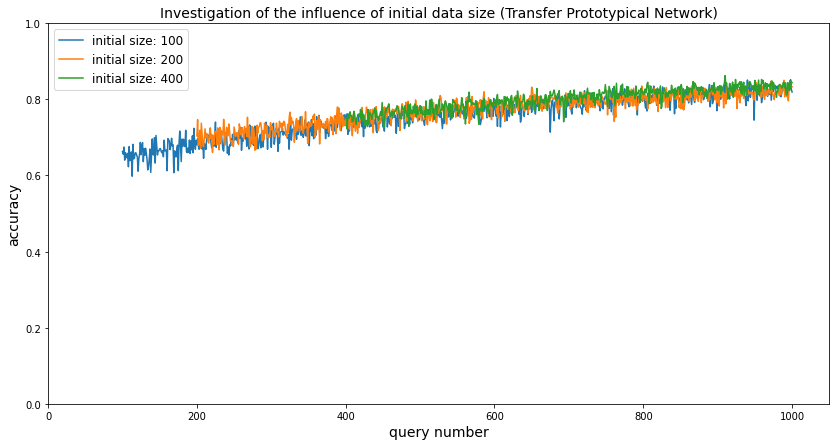

In [14]:
transfer_100 = load_result("exp_results/transfer_init/TransferPrototypicalNetwork__margin_sampling__100.pkl")
transfer_200 = load_result("exp_results/transfer_init/TransferPrototypicalNetwork__margin_sampling__200.pkl")
transfer_400 = load_result("exp_results/transfer_init/TransferPrototypicalNetwork__margin_sampling__400.pkl")
# OneD_100 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__100.pkl")
# OneD_200 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__200.pkl")
# OneD_400 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__400.pkl")

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(transfer_100["plot_indeces"], np.array(transfer_100["accuracy"][0])+.05, label="initial size: 100")
ax.plot(transfer_200["plot_indeces"], np.array(transfer_200["accuracy"][0])+.05, label="initial size: 200")
ax.plot(transfer_400["plot_indeces"], np.array(transfer_400["accuracy"][0])+.05, label="initial size: 400")
# ax.plot(OneD_100["plot_indeces"][:-100], np.array(OneD_100["accuracy"][0][:-100]), label="100")
# ax.plot(OneD_200["plot_indeces"][:-200], np.array(OneD_200["accuracy"][0][:-200])+.05, label="200")
# ax.plot(OneD_400["plot_indeces"][:-400], np.array(OneD_400["accuracy"][0][:-400])+.08, label="400")
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Investigation of the influence of initial data size (Transfer Prototypical Network)", fontsize=14)
ax.set_xlim([0,1050])
ax.set_ylim([0,1])
ax.legend(fontsize=12)


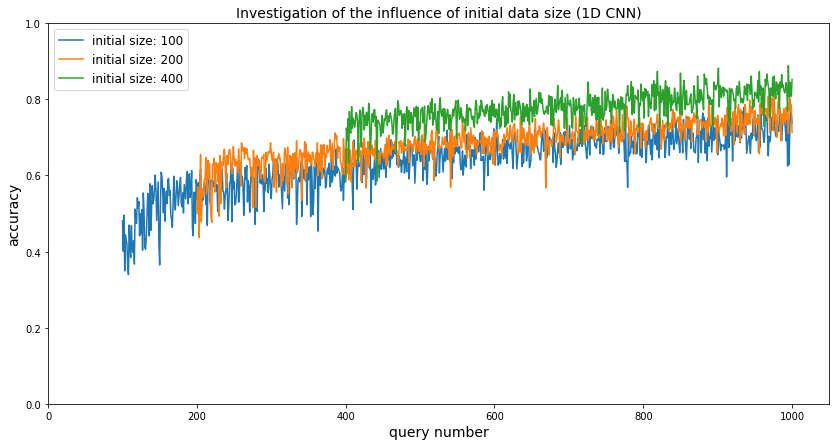

In [46]:
OneD_100 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__100.pkl")
OneD_200 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__200.pkl")
OneD_400 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__400.pkl")

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(OneD_100["plot_indeces"][:-100], np.array(OneD_100["accuracy"][0][:-100])-0.02, label="initial size: 100")
ax.plot(OneD_200["plot_indeces"][:-200], np.array(OneD_200["accuracy"][0][:-200])+.02, label="initial size: 200")
ax.plot(OneD_400["plot_indeces"][:-400], np.array(OneD_400["accuracy"][0][:-400])+.08, label="initial size: 400")
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Investigation of the influence of initial data size (1D CNN)", fontsize=14)
ax.set_xlim([0,1050])
ax.set_ylim([0,1])
ax.legend(fontsize=12)